In [5]:
from brian2 import *
import brian2.numpy_ as np
prefs.codegen.target = 'numpy'

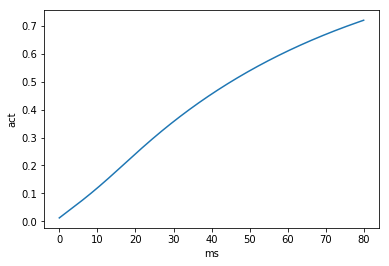

In [6]:
start_scope()
#Implementing the independent Km current.
duration = 100*ms
#Parameters
C = 1*ufarad
gKm = 0.0001*siemens
VKm = -90*mV
b0Km = 60*ms
vhalfl = -40*mV
vhalft = -42*mV
sh = 24*mV
kl = -10*mV
a0t = 0.003/ms
zetat = 7
gmt = 0.4/mV
V0 = -60*mV

eqs = Equations('''
                    #I = IKm 
                    dV/dt = (IKm + I)/C : volt
                    IKm = gKm*mKm*(V-VKm) : amp
                    dmKm/dt = (infKm - mKm)/tauKm : 1
                    infKm = (1/(1 + exp((V-vhalfl-sh)/(kl)))) : 1
                    tauKm = b0Km + bettKm/(a0t*(1+alptKm)) : second
                    alptKm = exp(0.0378*(mV**-1)*zetat*(V-vhalft-sh)) : 1
                    bettKm = exp(0.0378*zetat*gmt*(V-vhalft-sh)) : 1
                    I : amp
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='rk4')

#group.V = V0
#group.V = -40*mV
group.mKm = (1/(1 + exp((V0-vhalfl-sh)/(kl))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-70, 20, 100)*mV
taus = []
Ikms = []
ns = []
nn = []
#for volt in voltages:
    # Restore the original state of the network
 #   restore()
  #  group.V = volt
    # Run it with the new value of tau
 #   run(300*ms)
    #taus.append(M.tauKm[0])
    #Ikms.append(M.IKm[0])
    #ns.append(M.infKm[0])
   # nn.append(M.mKm[0])
run(80*ms)
#figure(1)
#plot(voltages, taus)
#xlabel('Voltage')
#ylabel('Tau');

#figure(2)
#plot(voltages, Ikms)
#xlabel('Volt')
#ylabel('Amps');

figure(1)
plot(M.t/ms, M.mKm[0])
xlabel('ms')
ylabel('act');

show()

#Questions:
#Missing units in constants? Whats the reversal potential?

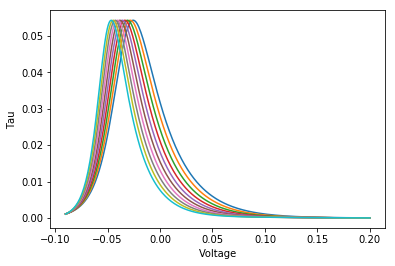

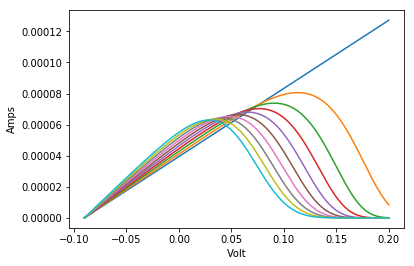

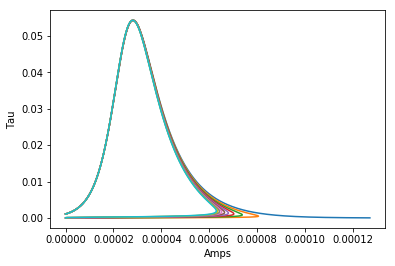

In [7]:
start_scope()
#Implementing the independent Kd current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKdmax=0.00045*siemens
vhalfm = -33*mV
zetam = 3/mV
sh = 0*mV
a0n = 0.01/ms
gmn = 0.7
q10 = 1
temp = 34
VKd = -90*mV
V0 = -65*mV



eqs = Equations('''
                    dV/dt = (IKd + I)/C : volt
                    IKd = gKd*(V-VKd) : amp
                    gKd = gKdmax*mKd : siemens
                    dmKd/dt = (infmKd - mKd)/taum : 1
                    infmKd = 1/(1+alpm) : 1
                    taum = betm/(qt*a0n*(1+alpm)) : second
                    alpm = exp(0.001*zetam*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    betm = exp(0.001*zetam*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    I : amp                
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

group.mKd = 1/(1+exp(0.001*zetam*(V0-vhalfm-sh)*96480/(8.315*(273.16 + temp))))

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, 200, 300)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKd[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()
#Questions
####if (taun<nmax) {taun=nmax/qt}?????
#What about the temperature?

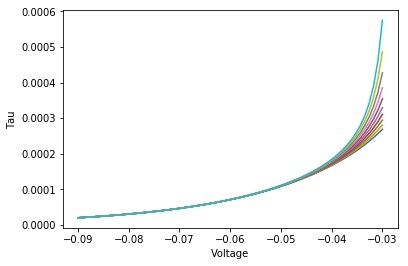

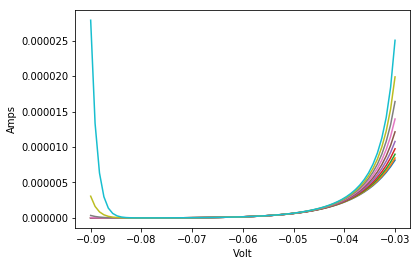

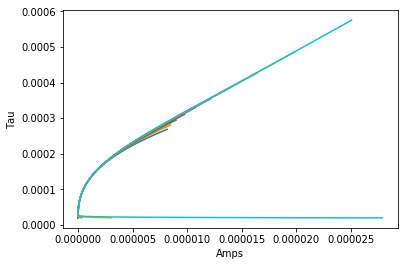

In [4]:
start_scope()
#Implementing the independent Ka current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKamax = 0.07*siemens
VKa = -77*mV
temp = 34
vhalfm = 11*mV
sh = 24*mV
zetam = -1.5/mV
pw = -1/mV
tq = -40*mV
qq = 5*mV
gmn = 0.55
q10 = 5
a0n = 0.05/ms
V0 = -30*mV

eqs = Equations('''
                    dV/dt = (IKa + I)/C : volt
                    IKa = gKa*(V-VKa) : amp
                    gKa = gKamax*mKa : siemens
                    dmKa/dt = (infmKa - mKa)/taum : 1
                    infmKa = 1/(1 + alpm) : 1                    
                    zeta = zetam + pw/(1+exp((V-tq-sh)/qq)) : 1/volt
                    taum = betm/(qt*a0n*(1+alpm)) : second
                    alpm = exp(0.001*zeta*(V-vhalfm-sh)*96480/(8.315*(273.16+temp))) : 1
                    betm = exp(0.001*zeta*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16+temp))) : 1
                    qt = q10**((temp-24)/10) : 1
                    I : amp
                    
                    #if (taun<nmin) {taun=nmin}?????
                               
''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='rk2')

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, -30, 70)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    zetaIn = zetam + pw/(1+exp((volt-tq-sh)/qq))
    alpm0 = exp(0.001*zetaIn*(volt-vhalfm-sh)*96480/(8.315*(273.16+temp)))
    group.mKa = 1/(1 + alpm0)
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKa[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()

In [ ]:
start_scope()
#Implementing the independent Kdr current.

duration = 100*ms
#Parameters
C = 1*ufarad
gKdrmax = 0.01*siemens
zetam = -3/mV
vhalfm = 13*mV
sh = 24*mV
temp = 34
q10 = 1
gmn = 0.7
V0 = -30*mV
a0n = 0.01/ms

eqs = Equations('''
                    dV/dt = (IKdr + I)/C : volt
                    IKdr = gKdr*(V-VKd) : amp
                    gKdr = gKdrmax*mKdr : siemens
                    dmKdr/dt = (infmKdr - mKdr)/taum : 1
                    infmKdr = 1/(1 + alpm) : 1
                    taum = betm/(qt*a0n*(1 + alpm)) : second
                    alpm = exp(0.001*zetam*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    betm = exp(0.001*zetam*gmn*(V-vhalfm-sh)*96480/(8.315*(273.16 + temp))) : 1
                    qt = q10**((temp - 24)/10) : 1
                    I : amp

''')

group = NeuronGroup(1, eqs,
                    threshold='V > -40*mV',
                    refractory='V > -40*mV',
                    method='exponential_euler')

M = StateMonitor(group, variables=True, record=True)
store()
#Plot tau and the channel current for different voltages
voltages = np.linspace(-90, 0, 100)*mV
taus = []
Ikms = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    group.mKdr = 1/(1+exp(0.001*zetam*(volt-vhalfm-sh)*96480/(8.315*(273.16 + temp))))
    group.V = volt
    # Run it with the new value of tau
    run(1*ms)
    taus.append(M.taum[0])
    Ikms.append(M.IKdr[0])
    
figure(1)
plot(voltages, taus)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Ikms)
xlabel('Volt')
ylabel('Amps');

figure(3)
plot(Ikms, taus)
xlabel('Amps')
ylabel('Tau');
show()
#Questions
#What about max/bar conductances (difference in conductance list vs mod files)